In [23]:
!pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/25/92/ee1d7a00bb6b8c55755d4984fd82608603a3cc59959245068ce32e7fb808/scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/61/d8/84da3fffefb6c7d5a16968fe5b9f24c98606b165bb801bb0b8bc3985200f/scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.7 MB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/91/29/df4b9b42f2be0b623cbd5e2140cafcaa2bef0759a00b7b70104dcfe2fb51/joblib-1.4.2-py3-none-any.whl.metadata
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Obtaining dependency information for threadpoolctl>=3.1.0 from https://files.pythonhosted.org/packages/32/d5/f9a850d79b0851d1d4ef6456097579a9005b31fea68726a4ae5f2d82ddd9/threadpoolctl-3.6.0-py3-none-any.wh

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from os import path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, confusion_matrix, 
                             roc_curve, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

In [29]:
df = pd.read_csv(path.join("data_practice.csv"))
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,N#CC12CC1CO2,5.99438,2.27301,1.94738,4.5933,55.81,-0.2627,-0.0086,0.2541,650.3290,...,0,0,0,0,0,0,0,0,0,0
1,COCC(O)C#CC=O,2.32923,0.75737,0.59946,3.4068,77.34,-0.2697,-0.0657,0.2040,1808.5114,...,0,0,0,0,0,0,0,0,0,0
2,COC1C2CC(=NO)C12,2.71950,1.23126,1.02616,1.2920,76.75,-0.2258,0.0156,0.2414,1215.4323,...,0,0,0,0,0,0,0,0,0,0
3,CC(CC=O)OCC#C,2.29944,0.85305,0.65285,3.1488,79.50,-0.2438,-0.0199,0.2239,1685.1071,...,0,0,0,1,0,0,0,0,0,0
4,COC(=N)N1CCC1=N,3.03493,1.26316,0.90731,1.9135,77.81,-0.2343,0.0056,0.2400,1271.6972,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C1CC1(CCC#N)C=O,2.81953,0.95253,0.78315,5.6157,77.77,-0.2667,-0.0340,0.2328,1442.5369,...,0,0,0,0,0,0,0,0,0,0
4996,CCN1C2CC3OC2C13,4.22393,1.23139,1.15079,1.2093,78.14,-0.2139,0.0760,0.2898,1141.0494,...,0,0,0,0,0,0,0,0,0,0
4997,CN1C2CC(O)CC12C,2.40023,1.44261,1.26824,2.0425,81.95,-0.2130,0.0709,0.2839,1145.1258,...,0,0,0,0,0,0,0,0,0,0
4998,c1cnc([nH]1)OC=O,8.05652,1.25277,1.08801,4.1565,58.08,-0.2300,-0.0153,0.2147,988.9973,...,0,0,0,0,0,0,0,0,0,0


In [30]:
for column_name in df.columns[2:len(df.columns)]:
    #Обнаруживаем выбросы
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Удаление выбросов из основного DataFrame
    df2 = df[(df[column_name] >= Q1 - 1.5 * IQR) & (df[column_name] <= Q3 + 1.5 * IQR)]
df = df2

#дисперсия
# Отделяем первый столбец, который не будем использовать для отбора
first_column = df.iloc[:,0: 1]
gap = df['gap']
df.drop(['gap'],axis=1, inplace=True)
df.drop(first_column,axis=1, inplace=True)

disp = df.var()

FILTER_THRESHOLD = 0.1
to_drop = [column for column in disp.index if disp[column] < FILTER_THRESHOLD]
df = df.drop(to_drop, axis=1)

# Соединяем первый столбец с отобранными признаками
df = pd.concat([first_column, gap, df], axis=1)

print("\nОтобранные признаки (с дисперсией выше 0.1):")
df


Отобранные признаки (с дисперсией выше 0.1):


,smiles,gap,A,B,C,mu,alpha,r2,u0,u298,...,fr_aldehyde,fr_allylic_oxid,fr_amide,fr_bicyclic,fr_ether,fr_ketone,fr_ketone_Topliss,fr_nitrile,fr_piperdine,fr_term_acetylene
0,N#CC12CC1CO2,0.2541,5.99438,2.27301,1.94738,4.5933,55.81,650.3290,-323.338627,-323.332830,...,0,0,0,1,1,0,0,1,0,0
1,COCC(O)C#CC=O,0.2040,2.32923,0.75737,0.59946,3.4068,77.34,1808.5114,-458.914682,-458.903948,...,1,0,0,0,1,0,0,0,0,0
2,COC1C2CC(=NO)C12,0.2414,2.71950,1.23126,1.02616,1.2920,76.75,1215.4323,-438.996978,-438.988148,...,0,0,0,1,1,0,0,0,0,0
3,CC(CC=O)OCC#C,0.2239,2.29944,0.85305,0.65285,3.1488,79.50,1685.1071,-422.988608,-422.977883,...,1,0,0,0,1,0,0,0,0,1
4,COC(=N)N1CCC1=N,0.2400,3.03493,1.26316,0.90731,1.9135,77.81,1271.6972,-435.272093,-435.262958,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,C1CC1(CCC#N)C=O,0.2328,2.81953,0.95253,0.78315,5.6157,77.77,1442.5369,-401.969669,-401.960439,...,1,0,0,0,0,0,0,1,0,0
4996,CCN1C2CC3OC2C13,0.2898,4.22393,1.23139,1.15079,1.2093,78.14,1141.0494,-403.082393,-403.074974,...,0,0,0,0,1,0,0,0,0,0
4997,CN1C2CC(O)CC12C,0.2839,2.40023,1.44261,1.26824,2.0425,81.95,1145.1258,-404.332161,-404.322884,...,0,0,0,1,0,0,0,0,1,0
4998,c1cnc([nH]1)OC=O,0.2147,8.05652,1.25277,1.08801,4.1565,58.08,988.9973,-414.713710,-414.706937,...,0,0,0,0,1,0,0,0,0,0


In [32]:

X = df.drop(columns=['smiles', 'gap']) #все остальное
y = df['gap']  # Целевая переменная

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабирование данных (для SVM и других чувствительных к масштабу моделей)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
#Линейная регрессия
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

# Метрики
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Метрики ЛР:")
print(f"MSE: {mse_lr:.4f}, RMSE: {rmse_lr:.4f}, MAE: {mae_lr:.4f}, R²: {r2_lr:.4f}")

Метрики ЛР:
MSE: 0.0003, RMSE: 0.0166, MAE: 0.0124, R²: 0.8793


In [34]:
# Лес
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)  # RF не требует масштабирования
y_pred_rf = rf.predict(X_test)

# Метрики
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("\nМетрики леса:")
print(f"MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")


Метрики леса:
MSE: 0.0002, RMSE: 0.0150, MAE: 0.0102, R²: 0.9014


In [35]:
# Опорные вектора
svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

# Метрики
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("\nМетрики опорных векторов:")
print(f"MSE: {mse_svr:.4f}, RMSE: {rmse_svr:.4f}, MAE: {mae_svr:.4f}, R²: {r2_svr:.4f}")


Метрики опорных векторов:
MSE: 0.0020, RMSE: 0.0446, MAE: 0.0370, R²: 0.1337


In [36]:
# Оптимизация гиперпараметров лучшей модели
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Метрики оптимизированной модели
mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mse_best_rf)
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
print("\nОптимизированные метрики Леса")
print(f"MSE: {mse_best_rf:.4f}, RMSE: {rmse_best_rf:.4f}, MAE: {mae_best_rf:.4f}, R²: {r2_best_rf:.4f}")
print(f"Лучшие значения: {grid_search.best_params_}")


Оптимизированные метрики Леса
MSE: 0.0002, RMSE: 0.0150, MAE: 0.0102, R²: 0.9025
Лучшие значения: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


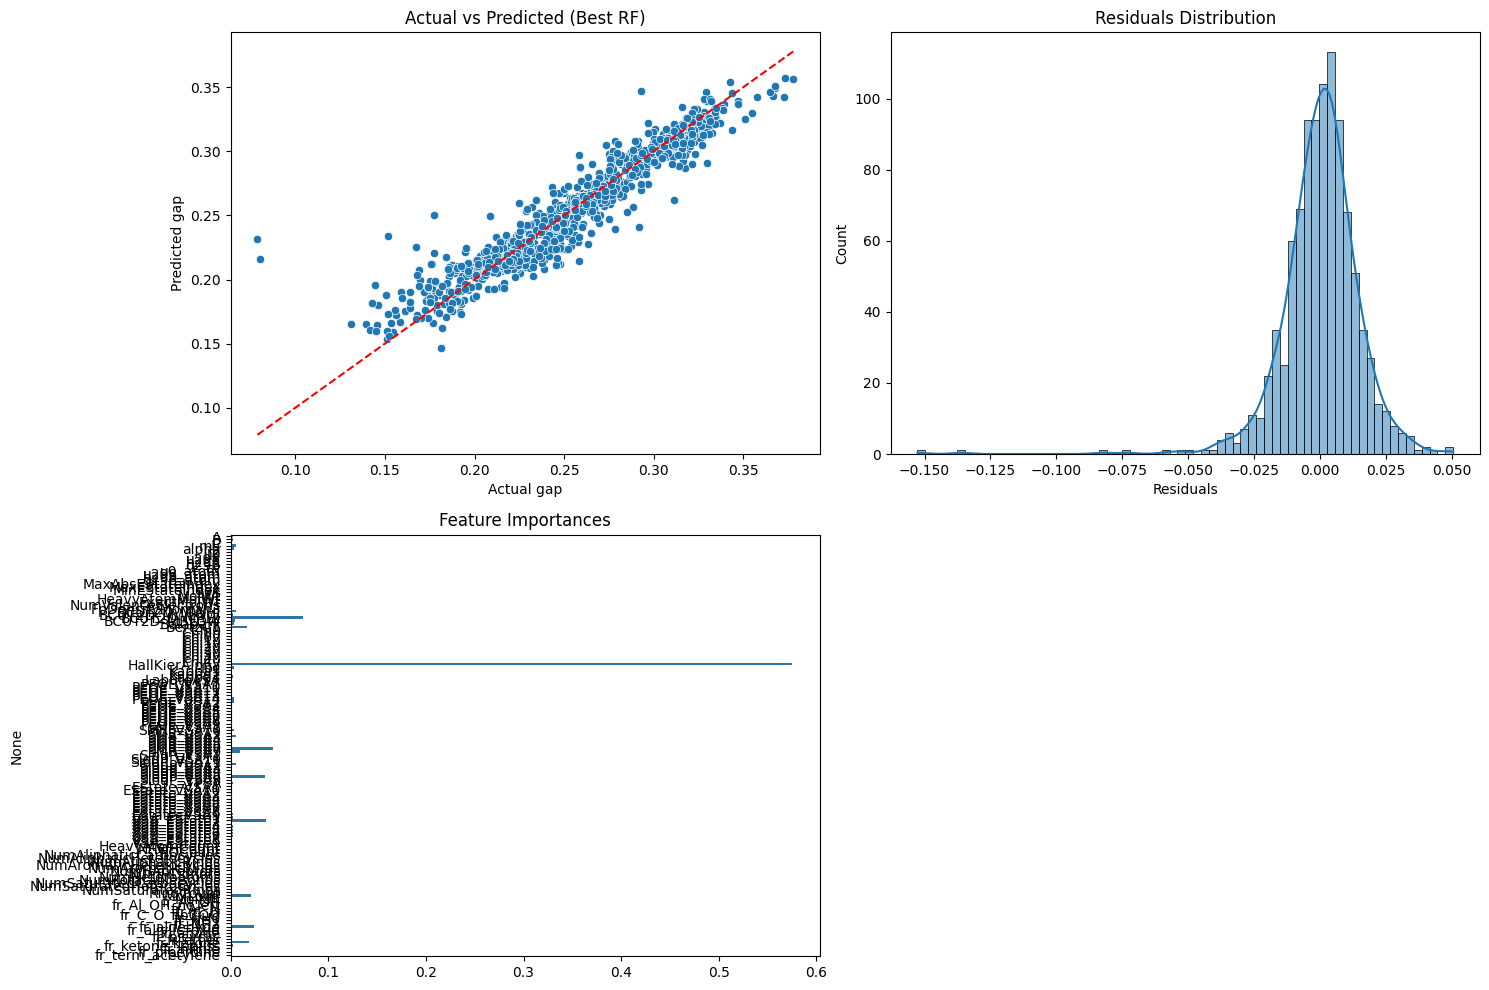


Анализ результатов:
1. Random Forest показал наилучшие результаты среди базовых моделей.
2. После оптимизации гиперпараметров качество модели улучшилось (R² увеличился).
3. Распределение остатков близко к нормальному, что указывает на хорошую спецификацию модели.
4. Наибольший вклад в предсказание вносят следующие признаки: ['HallKierAlpha', 'BCUT2D_MRHI', 'SMR_VSA7']


In [37]:
plt.figure(figsize=(15, 10))
# График предсказанных vs фактических значений
plt.subplot(2, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_best_rf)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual gap')
plt.ylabel('Predicted gap')
plt.title('Actual vs Predicted (Best RF)')
# Распределение остатков
residuals = y_test - y_pred_best_rf
plt.subplot(2, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Residuals Distribution')
# Важность признаков
plt.subplot(2, 2, 3)
importances = best_rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')

plt.tight_layout()
plt.show()

# Анализ результатов
print("\nАнализ результатов:")
print("1. Random Forest показал наилучшие результаты среди базовых моделей.")
print("2. После оптимизации гиперпараметров качество модели улучшилось (R² увеличился).")
print("3. Распределение остатков близко к нормальному, что указывает на хорошую спецификацию модели.")
print("4. Наибольший вклад в предсказание вносят следующие признаки:", list(features[np.argsort(importances)[-3:][::-1]]))

Logistic Regression Metrics:
Accuracy: 0.9415, Precision: 0.9259, Recall: 0.9596
F1-score: 0.9425, ROC-AUC: 0.9831

Random Forest Metrics:
Accuracy: 0.9315, Precision: 0.9331, Recall: 0.9293
F1-score: 0.9312, ROC-AUC: 0.9767

SVC Metrics:
Accuracy: 0.9294, Precision: 0.9191, Recall: 0.9414
F1-score: 0.9301, ROC-AUC: 0.9754

Optimized Random Forest Metrics:
Accuracy: 0.9304, Precision: 0.9312, Recall: 0.9293
F1-score: 0.9302, ROC-AUC: 0.9768
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


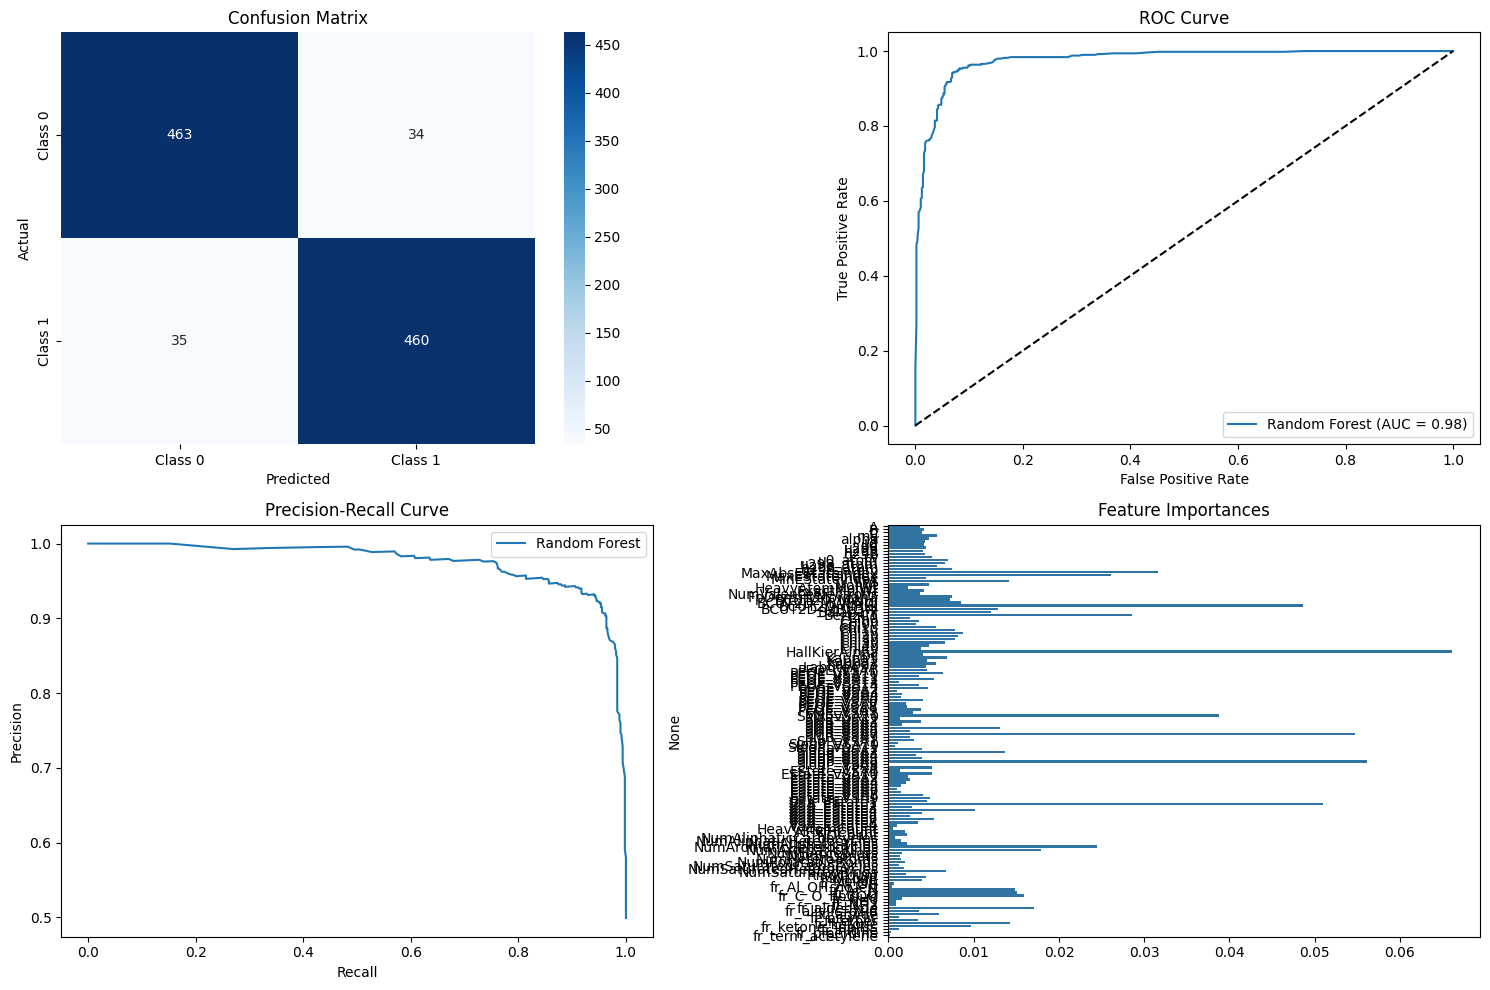


Анализ результатов:
1. Лучшая модель: Random Forest с F1-мерой 0.9302 и ROC-AUC 0.9768.
2. Матрица ошибок показывает, сколько примеров классифицировано правильно/неправильно.
3. ROC-AUC близкий к 1 указывает на хорошее разделение классов.
4. Наиболее важные признаки для классификации: ['HallKierAlpha', 'SlogP_VSA6', 'SMR_VSA7']


In [40]:
X = df.drop(columns=['smiles', 'gap'])  # Все признаки, кроме smiles и gap
y = df['gap']  # Целевая переменная

# Разделение на 2 класса (например, медианное разделение)
threshold = y.median()  # Можно выбрать другой порог (например, среднее значение)
y_class = (y > threshold).astype(int)  # 1 если gap выше порога, иначе 0

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X, y_class, test_size=0.2, random_state=42, stratify=y_class
)

# Масштабирование данных (для SVM и логистической регрессии)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### 1. Логистическая регрессия
lr = LogisticRegression(random_state=42, max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]  # Вероятности для ROC-AUC

# Метрики
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_proba_lr)

print("Logistic Regression Metrics:")
print(f"Accuracy: {accuracy_lr:.4f}, Precision: {precision_lr:.4f}, Recall: {recall_lr:.4f}")
print(f"F1-score: {f1_lr:.4f}, ROC-AUC: {roc_auc_lr:.4f}")

### 2. Случайный лес
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)  # RF не требует масштабирования
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

# Метрики
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_proba_rf)

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_rf:.4f}, Precision: {precision_rf:.4f}, Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}, ROC-AUC: {roc_auc_rf:.4f}")

### 3. Метод опорных векторов (SVC)
svc = SVC(probability=True, random_state=42)  # probability=True для predict_proba
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]

# Метрики
accuracy_svc = accuracy_score(y_test, y_pred_svc)
precision_svc = precision_score(y_test, y_pred_svc)
recall_svc = recall_score(y_test, y_pred_svc)
f1_svc = f1_score(y_test, y_pred_svc)
roc_auc_svc = roc_auc_score(y_test, y_proba_svc)

print("\nSVC Metrics:")
print(f"Accuracy: {accuracy_svc:.4f}, Precision: {precision_svc:.4f}, Recall: {recall_svc:.4f}")
print(f"F1-score: {f1_svc:.4f}, ROC-AUC: {roc_auc_svc:.4f}")

### Оптимизация гиперпараметров лучшей модели (Random Forest)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='f1',  # Оптимизируем по F1-мере
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)
y_proba_best_rf = best_rf.predict_proba(X_test)[:, 1]

# Метрики оптимизированной модели
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf)
recall_best_rf = recall_score(y_test, y_pred_best_rf)
f1_best_rf = f1_score(y_test, y_pred_best_rf)
roc_auc_best_rf = roc_auc_score(y_test, y_proba_best_rf)

print("\nOptimized Random Forest Metrics:")
print(f"Accuracy: {accuracy_best_rf:.4f}, Precision: {precision_best_rf:.4f}, Recall: {recall_best_rf:.4f}")
print(f"F1-score: {f1_best_rf:.4f}, ROC-AUC: {roc_auc_best_rf:.4f}")
print(f"Best parameters: {grid_search.best_params_}")

### Визуализация результатов
plt.figure(figsize=(15, 10))

# Матрица ошибок
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# ROC-кривая
plt.subplot(2, 2, 2)
fpr, tpr, _ = roc_curve(y_test, y_proba_best_rf)
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc_best_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

# Кривая Precision-Recall
plt.subplot(2, 2, 3)
precision, recall, _ = precision_recall_curve(y_test, y_proba_best_rf)
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Важность признаков
plt.subplot(2, 2, 4)
importances = best_rf.feature_importances_
features = X.columns
sns.barplot(x=importances, y=features)
plt.title('Feature Importances')

plt.tight_layout()
plt.show()

### Анализ результатов
print("\nАнализ результатов:")
print(f"1. Лучшая модель: Random Forest с F1-мерой {f1_best_rf:.4f} и ROC-AUC {roc_auc_best_rf:.4f}.")
print("2. Матрица ошибок показывает, сколько примеров классифицировано правильно/неправильно.")
print("3. ROC-AUC близкий к 1 указывает на хорошее разделение классов.")
print("4. Наиболее важные признаки для классификации:", list(features[np.argsort(importances)[-3:][::-1]]))